# Previsão de Qualidade do Ar

## Proposta

Listar cada uma das features com o seu significado

---
## Análise Exploratória

Analisar cada uma das features e analisar sua distribuição

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from datetime import date, timedelta

In [7]:
# Configurar a conexão ao PostgreSQL
USER = "postgres"
PASSWORD = "password"
HOST = "localhost"  # Exemplo: "localhost" ou IP do servidor
PORT = "5432"  # Porta padrão do PostgreSQL
DB_NAME = "db_measurements"

# Criar a string de conexão
conn_str = f"postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB_NAME}"

# Criar a engine de conexão
engine = create_engine(conn_str)

# Testar a conexão e carregar dados em um DataFrame
query = "SELECT * FROM tbl_weather_history"
df_weather_history = pd.read_sql(query, engine)

# Testar a conexão e carregar dados em um DataFrame
query = "SELECT * FROM tbl_measurements"
df_measurements = pd.read_sql(query, engine)

# Exibir as primeiras linhas
print(df_weather_history.head())

   id     ds_city     dt_date  qt_avg_humidity  qt_avg_temp_c  qt_avg_vis_km  \
0   1  Valparaiso  2024-03-28             80.0           16.6           10.0   
1   2  Valparaiso  2024-03-29             76.0           17.2           10.0   
2   3  Valparaiso  2024-03-30             66.0           18.6           10.0   
3   4  Valparaiso  2024-03-31             49.0           18.8           10.0   
4   5  Valparaiso  2024-04-01             59.0           16.7           10.0   

   qt_max_wind_kph  qt_total_precip_mm  qt_pressure_mb  
0             11.9                 0.0         1014.38  
1             16.2                 0.0         1014.71  
2             23.1                 0.0         1014.13  
3             32.4                 0.0         1015.00  
4             24.6                 0.0         1015.25  


In [8]:
# estatisticas das features de histórico
df_measurements.head()

,id,id_sensor,ds_city,dt_date_from,dt_date_to,qt_pm25
0,1,67,Valparaíso,2024-03-26 03:00:00,2024-03-27 03:00:00,15.3
1,2,67,Valparaíso,2024-03-27 03:00:00,2024-03-28 03:00:00,12.0
2,3,67,Valparaíso,2024-03-28 03:00:00,2024-03-29 03:00:00,11.7
3,4,67,Valparaíso,2024-05-12 04:00:00,2024-05-13 04:00:00,11.0
4,5,67,Valparaíso,2024-05-13 04:00:00,2024-05-14 04:00:00,17.3


In [9]:
df_weather_history['dt_date'] = df_weather_history['dt_date'].apply(lambda x: x.isoformat() if pd.notnull(x) else None)
df_weather_history.head()

,id,ds_city,dt_date,qt_avg_humidity,qt_avg_temp_c,qt_avg_vis_km,qt_max_wind_kph,qt_total_precip_mm,qt_pressure_mb
0,1,Valparaiso,2024-03-28,80.0,16.6,10.0,11.9,0.0,1014.38
1,2,Valparaiso,2024-03-29,76.0,17.2,10.0,16.2,0.0,1014.71
2,3,Valparaiso,2024-03-30,66.0,18.6,10.0,23.1,0.0,1014.13
3,4,Valparaiso,2024-03-31,49.0,18.8,10.0,32.4,0.0,1015.00
4,5,Valparaiso,2024-04-01,59.0,16.7,10.0,24.6,0.0,1015.25


In [10]:
df_measurements['dt_date'] = df_measurements['dt_date_from'].apply(lambda x: x.date().isoformat() if pd.notnull(x) else None)
df_measurements.head()

,id,id_sensor,ds_city,dt_date_from,dt_date_to,qt_pm25,dt_date
0,1,67,Valparaíso,2024-03-26 03:00:00,2024-03-27 03:00:00,15.3,2024-03-26
1,2,67,Valparaíso,2024-03-27 03:00:00,2024-03-28 03:00:00,12.0,2024-03-27
2,3,67,Valparaíso,2024-03-28 03:00:00,2024-03-29 03:00:00,11.7,2024-03-28
3,4,67,Valparaíso,2024-05-12 04:00:00,2024-05-13 04:00:00,11.0,2024-05-12
4,5,67,Valparaíso,2024-05-13 04:00:00,2024-05-14 04:00:00,17.3,2024-05-13


In [11]:
# merge dos dois dataframes
df = pd.merge(df_weather_history, df_measurements, on=['ds_city', 'dt_date'], how='inner')
df.head()

,id_x,ds_city,dt_date,qt_avg_humidity,qt_avg_temp_c,qt_avg_vis_km,qt_max_wind_kph,qt_total_precip_mm,qt_pressure_mb,id_y,id_sensor,dt_date_from,dt_date_to,qt_pm25
0,365,Puerto Montt,2024-03-28,76.0,14.4,10.0,7.6,2.0,1018.75,147,491,2024-03-28 03:00:00,2024-03-29 03:00:00,30.4
1,365,Puerto Montt,2024-03-28,76.0,14.4,10.0,7.6,2.0,1018.75,507,21638,2024-03-28 03:00:00,2024-03-29 03:00:00,27.8
2,366,Puerto Montt,2024-03-29,78.0,12.5,8.7,15.8,3.2,1020.08,148,491,2024-03-29 03:00:00,2024-03-30 03:00:00,18.1
3,366,Puerto Montt,2024-03-29,78.0,12.5,8.7,15.8,3.2,1020.08,508,21638,2024-03-29 03:00:00,2024-03-30 03:00:00,17.8
4,367,Puerto Montt,2024-03-30,75.0,10.1,8.7,11.5,1.5,1024.50,149,491,2024-03-30 03:00:00,2024-03-31 03:00:00,24.1


In [12]:
# remocao de colunas
df.drop(columns=['id_x', 'id_y', 'id_sensor', 'dt_date_from', 'dt_date_to'], inplace=True)

In [13]:
# média da leitura dos sensores para cada cidade
df = df.groupby(['ds_city', 'dt_date']).mean().reset_index()
df.head()

,ds_city,dt_date,qt_avg_humidity,qt_avg_temp_c,qt_avg_vis_km,qt_max_wind_kph,qt_total_precip_mm,qt_pressure_mb,qt_pm25
0,Puerto Montt,2024-03-28,76.0,14.4,10.0,7.6,2.0,1018.75,29.10
1,Puerto Montt,2024-03-29,78.0,12.5,8.7,15.8,3.2,1020.08,17.95
2,Puerto Montt,2024-03-30,75.0,10.1,8.7,11.5,1.5,1024.50,24.55
3,Puerto Montt,2024-03-31,73.0,9.2,10.0,13.3,0.0,1023.04,26.15
4,Puerto Montt,2024-04-01,72.0,9.1,10.0,8.3,0.0,1019.50,43.75


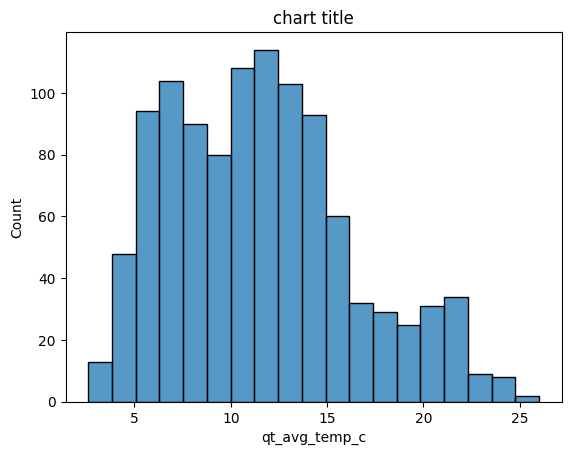

In [14]:
# distribuicao da temperatura média
sns.histplot(df['qt_avg_temp_c'])
plt.title('chart title')
plt.show()

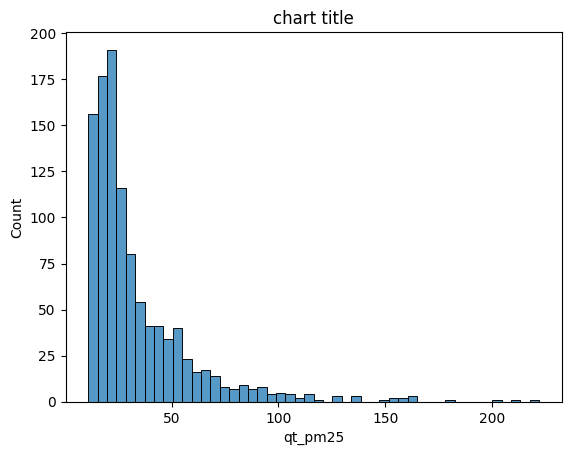

In [15]:
# distribuicao da pm2.5
sns.histplot(df['qt_pm25'])
plt.title('chart title')
plt.show()

---
## Pré Processamento

### Valores Duplicados

In [16]:
# verificação de existência de valores duplicados
print(df.duplicated().sum())
# remoçao de valores duplicados
#df.drop_duplicates()

0


### Valores Faltantes

In [17]:
# verificação de valores faltantes
print(df.isnull().sum())
# remoção de linhas com valores nulos
#df_clean = df.dropna()
# para preencher valores faltantes com a média da coluna
#df_filled = df.fillna(df.mean())

ds_city               0
dt_date               0
qt_avg_humidity       0
qt_avg_temp_c         0
qt_avg_vis_km         0
qt_max_wind_kph       0
qt_total_precip_mm    0
qt_pressure_mb        0
qt_pm25               0
dtype: int64


### Codificação de Variáveis Categóricas

In [18]:
# tratamento de data
df['dt_date'] = pd.to_datetime(df['dt_date'])
df["ano"] = df["dt_date"].dt.year
df["mes"] = df["dt_date"].dt.month
df["dia"] = df["dt_date"].dt.day
df.drop(columns=['dt_date'], inplace=True)
df.head()

,ds_city,qt_avg_humidity,qt_avg_temp_c,qt_avg_vis_km,qt_max_wind_kph,qt_total_precip_mm,qt_pressure_mb,qt_pm25,ano,mes,dia
0,Puerto Montt,76.0,14.4,10.0,7.6,2.0,1018.75,29.10,2024,3,28
1,Puerto Montt,78.0,12.5,8.7,15.8,3.2,1020.08,17.95,2024,3,29
2,Puerto Montt,75.0,10.1,8.7,11.5,1.5,1024.50,24.55,2024,3,30
3,Puerto Montt,73.0,9.2,10.0,13.3,0.0,1023.04,26.15,2024,3,31
4,Puerto Montt,72.0,9.1,10.0,8.3,0.0,1019.50,43.75,2024,4,1


In [20]:
from sklearn.preprocessing import OneHotEncoder

# Instanciando a classe do OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['ds_city']]).toarray()
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['ds_city']))

# Concatenar os novos dados codificados ao dados
df_encoded = pd.concat([df, df_encoded], axis=1)
df_encoded = df_encoded.drop(['ds_city'], axis=1)
df_encoded.head()

,qt_avg_humidity,qt_avg_temp_c,qt_avg_vis_km,qt_max_wind_kph,qt_total_precip_mm,qt_pressure_mb,qt_pm25,ano,mes,dia,ds_city_Puerto Montt,ds_city_Puerto Varas,ds_city_Santiago
0,76.0,14.4,10.0,7.6,2.0,1018.75,29.10,2024,3,28,1.0,0.0,0.0
1,78.0,12.5,8.7,15.8,3.2,1020.08,17.95,2024,3,29,1.0,0.0,0.0
2,75.0,10.1,8.7,11.5,1.5,1024.50,24.55,2024,3,30,1.0,0.0,0.0
3,73.0,9.2,10.0,13.3,0.0,1023.04,26.15,2024,3,31,1.0,0.0,0.0
4,72.0,9.1,10.0,8.3,0.0,1019.50,43.75,2024,4,1,1.0,0.0,0.0


---
## Divisão dos Dados em Treino e Teste

In [21]:
# divisão dos dados
X = df_encoded.drop(['qt_pm25'], axis=1)
y = df_encoded['qt_pm25'].values

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Normalização

In [17]:
#from sklearn.preprocessing import Normalizer

# Inicializar o Normalizer
#normalizer = Normalizer.fit(X)
# Normalização entre 0 e 1
#X_train_normalized = normalizer.transform(X_train)
#X_test_normalized = normalizer.transform(X_test)

### Padronização

In [23]:
from sklearn.preprocessing import StandardScaler

# Inicializar o StandardScaler
scaler = StandardScaler()

# Ajustar o scaler apenas na base de treino
scaler.fit(X_train)

# Aplicar a transformação nas bases de treino e teste
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
## Definição de Métricas de Avaliação

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [25]:
# função para testar modelos de regressão e retornar valores das métricas
def reg_evaluation(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')
    return

---
## Treinamento dos Modelos

### Regressão Linear

In [26]:
from sklearn.linear_model import LinearRegression

# criando e treinando o modelo
reg_model = LinearRegression()
reg_evaluation(reg_model, X_train_scaled, y_train, X_test_scaled, y_test)

MSE: 602.1777204596567
RMSE: 24.53930969810799
MAPE: 0.4041597456040365


In [27]:
y_test.shape

(216,)

### KNN Regressor

In [28]:
from sklearn.neighbors import KNeighborsRegressor

# criando e treinando o modelo
knn_reg_model = KNeighborsRegressor()
reg_evaluation(knn_reg_model, X_train_scaled, y_train, X_test_scaled, y_test)

MSE: 403.75641805555546
RMSE: 20.09369100129579
MAPE: 0.23434173962953797


### SVR

In [30]:
from sklearn.svm import SVR

# criando e treinando o modelo
svr_model = SVR()
reg_evaluation(svr_model, X_train_scaled, y_train, X_test_scaled, y_test)

MSE: 720.1648859584354
RMSE: 26.835888022542413
MAPE: 0.2388710953497517


### Árvore de Regressão

In [31]:
from sklearn.tree import DecisionTreeRegressor

# criando e treinando o modelo
tree_reg_model = DecisionTreeRegressor()
reg_evaluation(tree_reg_model, X_train_scaled, y_train, X_test_scaled, y_test)

MSE: 612.8436574074075
RMSE: 24.755679296020286
MAPE: 0.2608492394014676


### XGBoost

In [33]:
from xgboost import XGBRegressor

# criando e treinando o modelo
xgb_model = XGBRegressor()
reg_evaluation(xgb_model, X_train_scaled, y_train, X_test_scaled, y_test)

MSE: 433.80769413431443
RMSE: 20.828050656129932
MAPE: 0.2244444258093052


---
## Otimização do Modelo

### Grid Search com Validação Cruzada

In [34]:
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Definindo os parâmetros a serem ajustados
parameters = {'booster':('gbtree', 'dart'), 'eta': (0.01, 0.1, 0.3), 'max_depth': (3, 6, 10)}

# Criando o modelo
xgb_model = XGBRegressor()

# Ajuste fino com validação cruzada
clf = GridSearchCV(xgb_model, parameters, cv=10)

# Treinando o modelo com otimização
clf.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'booster': ('gbtree', 'dart'), 'eta': (0.01, 0.1, 0.3),
                         'max_depth': (3, 6, 10)})

In [35]:
y_pred = clf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 328.9439271887986
RMSE: 18.136811384275866
MAPE: 0.2683222382466696


In [36]:
import pickle

# Salvar o modelo treinado
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Modelo salvo como 'model.pkl'")

NameError: name 'model' is not defined